<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da11_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 합치기

* merge(join): 두 개의 DataFrame을 공통된 컬럼(들)을 기준으로 합치는 것.
* concat: DataFrame을 축(axis)을 따라서 합치는 것.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

In [2]:
emp = pd.DataFrame({
    'empno': [100, 101, 102, 103],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})
emp

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,102,Allen,10
3,103,Tiger,50


In [3]:
dept = pd.DataFrame({
    'deptno': [10, 20, 30],
    'dname': ['IT', 'HR', 'Sales']
})
dept

,deptno,dname
0,10,IT
1,20,HR
2,30,Sales


In [4]:
# pd.merge 함수
pd.merge(emp, dept, how='inner', on='deptno')
# how: join 방식. inner, left, right, outer. inner는 생략가능(default argument)
# on: join의 기준이 되는 컬럼(들의 리스트). 컬럼 이름이 같은 경우에는 on도 생략 가능.

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,102,Allen,10,IT
2,101,King,20,HR


In [5]:
# pd.DataFrame.merge 메서드
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,102,Allen,10,IT
2,101,King,20,HR


In [6]:
# left (outer) join
pd.merge(emp, dept, how='left')  # on='deptno' 생략 가능.

,empno,ename,deptno,dname
0,100,Scott,10,IT
1,101,King,20,HR
2,102,Allen,10,IT
3,103,Tiger,50,NaN


In [7]:
# right (outer) join
pd.merge(emp, dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,IT
1,102.0,Allen,10,IT
2,101.0,King,20,HR
3,NaN,NaN,30,Sales


In [8]:
# full outer join
pd.merge(emp, dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,IT
1,102.0,Allen,10,IT
2,101.0,King,20,HR
3,103.0,Tiger,50,NaN
4,NaN,NaN,30,Sales


join 기준이 되는 컬럼 이름이 서로 다른 경우

In [9]:
employees = pd.DataFrame({
    'empno': [100, 101, 102, 103],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})
employees

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,102,Allen,10
3,103,Tiger,50


In [10]:
departments = pd.DataFrame({
    'dno': [10, 20, 30],
    'dname': ['IT', 'HR', 'Sales']
})
departments

,dno,dname
0,10,IT
1,20,HR
2,30,Sales


In [11]:
pd.merge(employees, departments, how='inner', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,IT
1,102,Allen,10,10,IT
2,101,King,20,20,HR


인덱스를 사용한 merge

In [12]:
np.random.seed(1)

df1 = pd.DataFrame(data={'value1': np.random.randint(10, size=6), 
                         'value2': np.random.randint(100, size=6)},
                   index=['a', 'b', 'c'] * 2)
df1

,value1,value2
a,5,1
b,8,76
c,9,71
a,5,6
b,0,25
c,0,50


In [13]:
np.random.seed(2)

df2 = pd.DataFrame(data={'data1': np.random.rand(3),
                         'data2': np.random.randn(3)},
                   index=['a', 'b', 'c'])
df2

,data1,data2
a,0.435995,-1.953796
b,0.025926,-1.586882
c,0.549662,-1.074456


In [14]:
pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

,value1,value2,data1,data2
a,5,1,0.435995,-1.953796
a,5,6,0.435995,-1.953796
b,8,76,0.025926,-1.586882
b,0,25,0.025926,-1.586882
c,9,71,0.549662,-1.074456
c,0,50,0.549662,-1.074456


컬럼과 인덱스를 사용한 merge

In [15]:
df1 = pd.DataFrame(data={'value1': np.arange(6),
                         'value2': ['a', 'b', 'c'] * 2})
df1

,value1,value2
0,0,a
1,1,b
2,2,c
3,3,a
4,4,b
5,5,c


In [16]:
df2 = pd.DataFrame(data={'data': [10, 20, 30]},
                   index=['a', 'b', 'c'])
df2

,data
a,10
b,20
c,30


In [17]:
pd.merge(df1, df2, how='inner', left_on='value2', right_index=True)

,value1,value2,data
0,0,a,10
3,3,a,10
1,1,b,20
4,4,b,20
2,2,c,30
5,5,c,30


# concat

## pd.Series의 concat

In [18]:
s1 = pd.Series(data=['a', 'b', 'c'])
s1

0    a
1    b
2    c
dtype: object

In [19]:
s2 = pd.Series(data=['d', 'e'])
s2

0    d
1    e
dtype: object

In [20]:
result = pd.concat([s1, s2], axis=0)  # axis=0은 생략 가능(defualt argument)
result  #> 결과는 Series

0    a
1    b
2    c
0    d
1    e
dtype: object

In [21]:
result.loc[0]

0    a
0    d
dtype: object

In [22]:
pd.concat([s1, s2], ignore_index=True)
# ignore_index: 이어줄 Series 또는 DataFrame의 index를 무시할 지를 결정. 기본값은 False.

0    a
1    b
2    c
3    d
4    e
dtype: object

axis=1 방향 concat

In [23]:
pd.concat([s1, s2], axis=1)  #> 결과는 DataFrame

,0,1
0,a,d
1,b,e
2,c,NaN


In [24]:
np.random.seed(1)
s1 = pd.Series(data=np.random.randn(3), index=['a', 'b', 'c'])
s2 = pd.Series(data=np.random.randn(3), index=['d', 'e', 'f'])

In [25]:
s1

a    1.624345
b   -0.611756
c   -0.528172
dtype: float64

In [26]:
s2

d   -1.072969
e    0.865408
f   -2.301539
dtype: float64

In [27]:
# axis=0 방향 concat => 결과는 Series
pd.concat([s1, s2])

a    1.624345
b   -0.611756
c   -0.528172
d   -1.072969
e    0.865408
f   -2.301539
dtype: float64

In [28]:
# axis=1 방향 concat => 결과는 (6, 2) shape의 DataFrame
pd.concat([s1, s2], axis=1)

,0,1
a,1.624345,NaN
b,-0.611756,NaN
c,-0.528172,NaN
d,NaN,-1.072969
e,NaN,0.865408
f,NaN,-2.301539


## pandas.DataFrame의 concat

In [29]:
np.random.seed(1)

mid_term = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                        columns=['math', 'science', 'computer'])
final_term = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                          columns=['math', 'science', 'computer'])

In [30]:
mid_term

,math,science,computer
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50


In [31]:
final_term

,math,science,computer
0,20,18,84
1,11,28,29
2,14,50,68
3,87,87,94
4,96,86,13


In [32]:
# axis=0 concat
pd.concat([mid_term, final_term], ignore_index=True)

,math,science,computer
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50
5,20,18,84
6,11,28,29
7,14,50,68
8,87,87,94
9,96,86,13


In [33]:
# axis=1 concat
pd.concat([mid_term, final_term], axis=1)

,math,science,computer,math,science,computer
0,37,12,72,20,18,84
1,9,75,5,11,28,29
2,79,64,16,14,50,68
3,1,76,71,87,87,94
4,6,25,50,96,86,13


In [34]:
np.random.seed(1)

df1 = pd.DataFrame(data=np.random.rand(3, 3),
                   index=['a', 'b', 'c'],
                   columns=['data1', 'data2', 'data3'])
df2 = pd.DataFrame(data=np.random.rand(2, 2),
                   index=['a', 'b'],
                   columns=['data2', 'data3'])

In [35]:
df1

,data1,data2,data3
a,0.417022,0.720324,0.000114
b,0.302333,0.146756,0.092339
c,0.186260,0.345561,0.396767


In [36]:
df2

,data2,data3
a,0.538817,0.419195
b,0.685220,0.204452


In [37]:
# axis=0 concat
pd.concat([df1, df2])

,data1,data2,data3
a,0.417022,0.720324,0.000114
b,0.302333,0.146756,0.092339
c,0.186260,0.345561,0.396767
a,NaN,0.538817,0.419195
b,NaN,0.685220,0.204452


In [38]:
# axis=1 concat
pd.concat([df1, df2], axis=1)

,data1,data2,data3,data2,data3
a,0.417022,0.720324,0.000114,0.538817,0.419195
b,0.302333,0.146756,0.092339,0.685220,0.204452
c,0.186260,0.345561,0.396767,NaN,NaN


# merge, concat 연습

* https://github.com/pandas-dev/pandas/tree/master/doc/data/ 데이터 사용
* air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고 데이터 프레임 생성.
* air_quality_no2와 air_quality_pm25를 합치세요.
* 위 결과 데이터프레임과 stations 데이터프레임을 합치세요.

In [39]:
# 파일 경로
no2_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'
pm25_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_pm25_long.csv'
stations_data = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_stations.csv'

In [40]:
air_quality_no2 = pd.read_csv(no2_data)

In [41]:
air_quality_no2
#> 공기 중 NO2의 농도를 3개 도시에서 1시간 간격으로 측정한 데이터

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [42]:
air_quality_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [43]:
# city의 unique한 값 - pd.unique(Series/Array/List) 함수, pd.Series.unique() 메서드
# pd.unique(air_quality_no2['city'])
air_quality_no2['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [44]:
# country의 unique 값
air_quality_no2['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [45]:
# location의 unique 값
air_quality_no2['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [46]:
# parameter의 unique 값
air_quality_no2['parameter'].unique()

array(['no2'], dtype=object)

In [47]:
air_quality_pm25 = pd.read_csv(pm25_data)
# 지름이 2.5um 이하인 미세먼지의 공기 중 농도를 2개 도시에서 1시간 간격으로 측정한 데이터

In [48]:
air_quality_pm25

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [49]:
air_quality_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [50]:
air_quality_pm25['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [51]:
air_quality_pm25['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [52]:
air_quality_pm25['parameter'].unique()

array(['pm25'], dtype=object)

In [53]:
stations = pd.read_csv(stations_data)
# 미세먼지 측정소 이름, 경도, 위도 정보를 가지고 있는 데이터 프레임

In [54]:
stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [55]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [56]:
# NO2, PM25를 concat
air_quality = pd.concat([air_quality_no2, air_quality_pm25], ignore_index=True)

In [57]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [58]:
# air_quality와 stations를 merge
result = pd.merge(air_quality, stations)
# how='inner', on='location' 생략 가능

In [59]:
result

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   4182 non-null   object 
 1   country                4182 non-null   object 
 2   date.utc               4182 non-null   object 
 3   location               4182 non-null   object 
 4   parameter              4182 non-null   object 
 5   value                  4182 non-null   float64
 6   unit                   4182 non-null   object 
 7   coordinates.latitude   4182 non-null   float64
 8   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(6)
memory usage: 326.7+ KB


In [61]:
air_quality['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [62]:
stations[stations.location == 'FR04014']

,location,coordinates.latitude,coordinates.longitude
26,FR04014,48.83724,2.3939
27,FR04014,48.83722,2.3939


London의 NO2, PM25의 시간에 따른 변화를 시각화

In [63]:
# 데이터프레임의 date.utc 컬럼의 데이터 타입을 'datetime64'으로 변환
result['date.utc'] = result['date.utc'].astype('datetime64')

In [64]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   4182 non-null   object        
 1   country                4182 non-null   object        
 2   date.utc               4182 non-null   datetime64[ns]
 3   location               4182 non-null   object        
 4   parameter              4182 non-null   object        
 5   value                  4182 non-null   float64       
 6   unit                   4182 non-null   object        
 7   coordinates.latitude   4182 non-null   float64       
 8   coordinates.longitude  4182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 326.7+ KB


In [65]:
# result에서 영국 런던 데이터만 선택
london = result[result.city == 'London']

In [66]:
london

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
2204,London,GB,2019-06-17 11:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2205,London,GB,2019-06-17 10:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2206,London,GB,2019-06-17 09:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2207,London,GB,2019-06-17 08:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
2208,London,GB,2019-06-17 07:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


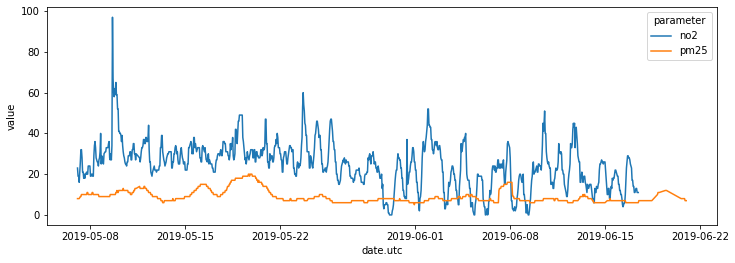

In [67]:
fig = plt.figure(figsize=(12, 4))
sns.lineplot(data=london, x='date.utc', y='value', hue='parameter')
plt.show()

# babynames 데이터 셋

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames/ 데이터 파일들을 사용
* 1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자수가 정리된 파일
* 파일을 하나씩 읽어서 데이터 프레임 생성하세요.
* 생성된 데이터 프레임에 year 컬럼을 추가하세요.
* 생성된 131개의 데이터 프레임을 하나로 합치세요.
* 연도별 신생아 수를 찾고 그래프를 그리세요.
* 연도별 성별 신생아 수를 찾고 그래프를 그리세요.

In [73]:
file1880 = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob1880.txt'
yob1880 = pd.read_csv(file1880, names=['name', 'gender', 'births'])
yob1880['year'] = 1880
yob1880

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [77]:
yobs = []  # 각 연도의 데이터프레임을 append할 리스트
for year in range(1880, 2011):  # 1880년부터 2010년까지 연도를 반복하면서
    # TXT 파일이 저장된 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    # 파일을 읽어서 DataFrame 생성
    yob_year = pd.read_csv(file_path, names=['name', 'gender', 'births'])
    # 생성된 DataFrame에 연도(year) 컬럼을 추가
    yob_year['year'] = year
    # 연도의 DataFrame을 리스트에 append
    yobs.append(yob_year)

In [82]:
# yobs: DataFrame들을 아이템으로 저장하고 있는 list
len(yobs)

131

In [83]:
yobs[0]  #> 리스트의 (첫번째) 원소는 DataFrame

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [85]:
yobs[-1]

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [86]:
# 131개 DataFrame들을 하나로 합침
df = pd.concat(yobs, ignore_index=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [88]:
df

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [89]:
# 연도별 신생아 숫자 - 연도별 부분집합에서 births의 합계(sum)을 계산해서 취합
births_by_year = df.groupby('year')['births'].sum()
births_by_year  #> Series

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

In [100]:
births_by_year_df = df.groupby(by='year', as_index=False)['births'].sum()
births_by_year_df

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


In [93]:
births_by_year.reset_index()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


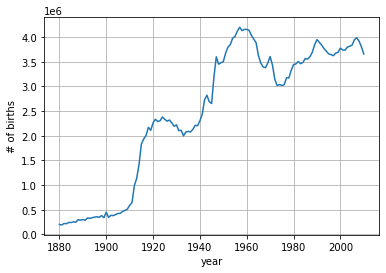

In [96]:
plt.plot(births_by_year)
#> Series의 values가 y좌표, Series의 index가 x좌표가 됨.
plt.xlabel('year')
plt.ylabel('# of births')
plt.grid()
plt.show()

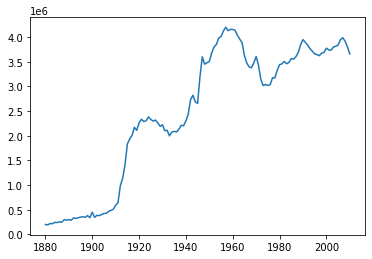

In [97]:
plt.plot(births_by_year.index, births_by_year.values)

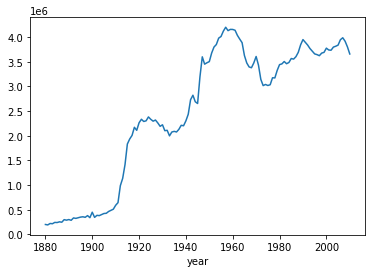

In [99]:
sns.lineplot(x=births_by_year.index, y=births_by_year.values)

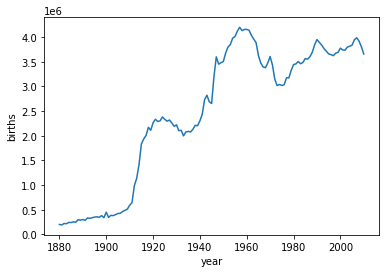

In [101]:
sns.lineplot(data=births_by_year_df, x='year', y='births')
plt.show()

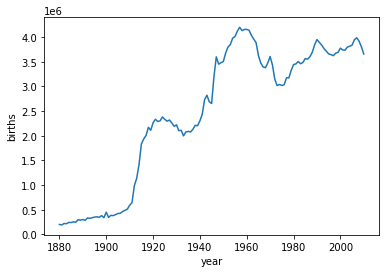

In [103]:
# seaborn 패키지의 그래프 함수는 groupby 계산을 직접 수행할 수 있음.
sns.lineplot(data=df, x='year', y='births', estimator='sum', err_style=None)
plt.show()

In [104]:
test_df = pd.DataFrame({'v1': [1, 2, 3], 'v2': [4, 5, 6]})
test_df

,v1,v2
0,1,4
1,2,5
2,3,6


In [108]:
test_df.sum()  # axis=0은 생략 가능
# axis=None은 axis=0과 동일. -> DataFrame에서는 모든 원소들의 통계값을 계산하는 방법은 없음.

v1     6
v2    15
dtype: int64

In [107]:
test_df.sum(axis=1)

0    5
1    7
2    9
dtype: int64

In [109]:
test_df['name'] = pd.Series(['a', 'b', 'c'])
test_df

,v1,v2,name
0,1,4,a
1,2,5,b
2,3,6,c


In [110]:
test_df.sum()

v1        6
v2       15
name    abc
dtype: object

In [112]:
test_df[['v1', 'v2']].sum()

v1     6
v2    15
dtype: int64

In [111]:
test_df.sum(axis=1)

0    5
1    7
2    9
dtype: int64

In [115]:
df.groupby('year').sum()

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


In [117]:
# 연도별 성별 신생아 수
births_by_year_gender = df.groupby(by=['year', 'gender'])['births'].sum()
births_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

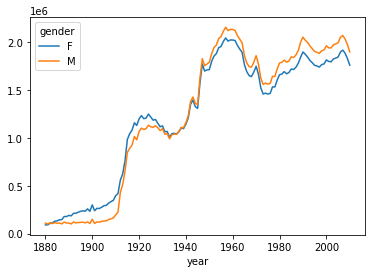

In [118]:
sns.lineplot(data=births_by_year_gender, x='year', y=births_by_year_gender.values, hue='gender')
plt.show()

In [119]:
# df.groupby(by=['year', 'gender'], as_index=False)['births'].sum()
births_by_year_gender_df = births_by_year_gender.reset_index()
births_by_year_gender_df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


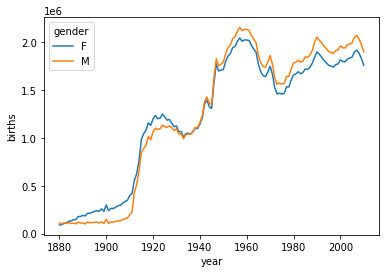

In [120]:
sns.lineplot(data=births_by_year_gender_df,
             x='year', y='births', hue='gender')
plt.show()

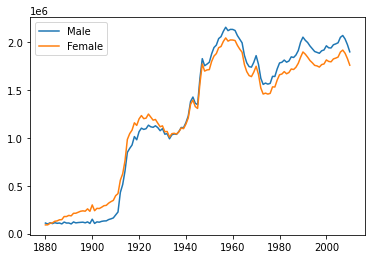

In [123]:
boys = births_by_year_gender_df[births_by_year_gender_df.gender == 'M']
girls = births_by_year_gender_df[births_by_year_gender_df.gender == 'F']

plt.plot(boys.year, boys.births, label='Male')
plt.plot(girls.year, girls.births, label='Female')
plt.legend()
plt.show()

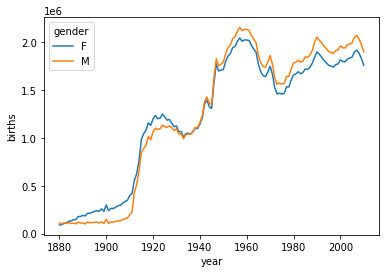

In [124]:
# seaborn 함수들의 groupby 자동 연산 기능
sns.lineplot(data=df, x='year', y='births', hue='gender', estimator='sum', err_style=None)
plt.show()